<a href="https://colab.research.google.com/github/charookc5/AIML_internship/blob/main/AIML_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [2]:
# Replace with your dataset path
df = pd.read_csv("Mall_Customers.csv")
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Select Features for Clustering

In [3]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]].values


Fit K-Means & Assign Clusters

In [4]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X)

df["Cluster"] = y_kmeans
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


Elbow Method (to choose K)

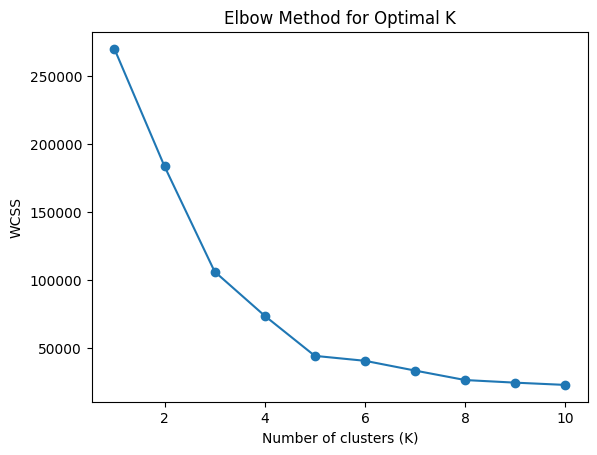

In [5]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()


Visualize Clusters

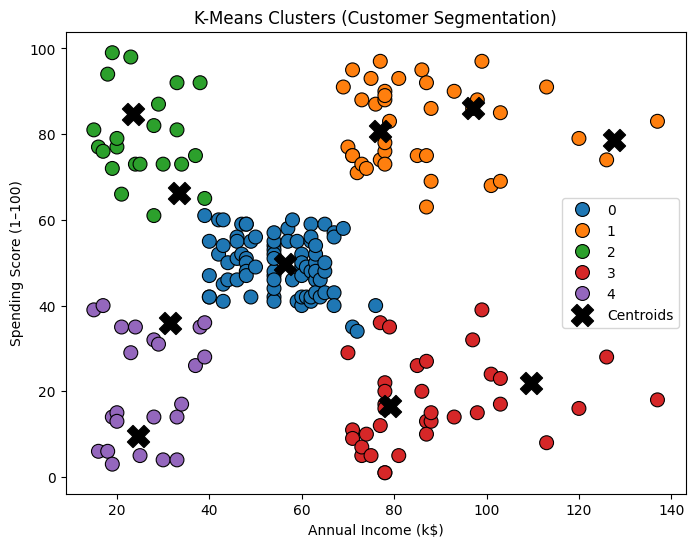

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=df["Cluster"],
                palette="tab10", s=100, edgecolor="k")

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="black", s=250, marker="X", label="Centroids")

plt.title("K-Means Clusters (Customer Segmentation)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.legend()
plt.show()


PCA for High-Dimensional Data

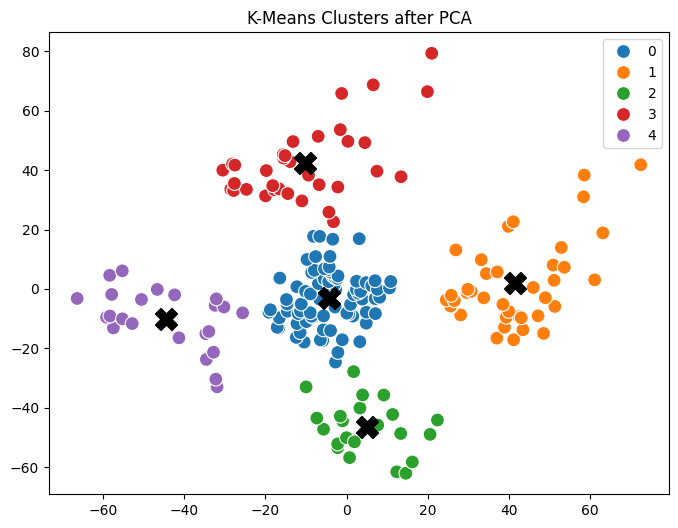

In [7]:
X_all = df.drop(["CustomerID","Cluster"], axis=1, errors="ignore")
X_all = pd.get_dummies(X_all, drop_first=True)  # handle Gender if categorical

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_all)

kmeans_pca = KMeans(n_clusters=5, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters_pca, palette="tab10", s=100)
plt.scatter(kmeans_pca.cluster_centers_[:,0], kmeans_pca.cluster_centers_[:,1],
            c="black", s=250, marker="X", label="Centroids")
plt.title("K-Means Clusters after PCA")
plt.show()


Evaluate with Silhouette Score

In [8]:
score = silhouette_score(X, y_kmeans)
print("Silhouette Score:", score)


Silhouette Score: 0.553931997444648
